In [ ]:
import csv
import pandas as pd
import numpy as np
from pandas import DataFrame

df = pd.read_csv('./test1.csv')
print(df)

                                  name       artists  ...    tempo  duration_ms
0                           God's Plan         Drake  ...   77.169       198973
1                                 SAD!  XXXTENTACION  ...   75.023       166606
2           rockstar (feat. 21 Savage)   Post Malone  ...  159.847       218147
3         Psycho (feat. Ty Dolla $ign)   Post Malone  ...  140.124       221440
4                       In My Feelings         Drake  ...   91.030       217925
..                                 ...           ...  ...      ...          ...
100                  Rewrite The Stars     Zac Efron  ...  125.046       217440
101  I Miss You (feat. Julia Michaels)  Clean Bandit  ...  105.076       205748
102                         No Brainer     DJ Khaled  ...  135.702       260000
103        Dusk Till Dawn - Radio Edit          ZAYN  ...  180.043       239000
104                         Be Alright    Dean Lewis  ...  126.684       196373

[105 rows x 14 columns]


In [ ]:
# 기본 전처리 : ‘artists’ 값이 없는 데이터를 제거하시오.
basic = df_dropna = df.dropna(subset=['artists']) # 컬럼 'artists'에 결측치가 있는 경우 삭제
print(basic)
basic.head()

                                  name       artists  ...    tempo  duration_ms
0                           God's Plan         Drake  ...   77.169       198973
1                                 SAD!  XXXTENTACION  ...   75.023       166606
2           rockstar (feat. 21 Savage)   Post Malone  ...  159.847       218147
3         Psycho (feat. Ty Dolla $ign)   Post Malone  ...  140.124       221440
4                       In My Feelings         Drake  ...   91.030       217925
..                                 ...           ...  ...      ...          ...
100                  Rewrite The Stars     Zac Efron  ...  125.046       217440
101  I Miss You (feat. Julia Michaels)  Clean Bandit  ...  105.076       205748
102                         No Brainer     DJ Khaled  ...  135.702       260000
103        Dusk Till Dawn - Radio Edit          ZAYN  ...  180.043       239000
104                         Be Alright    Dean Lewis  ...  126.684       196373

[100 rows x 14 columns]


,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973
1,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440
4,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925


In [ ]:
# 1-1. 가수별로 등록된 곡수를 집계해보고,
example1 = basic.groupby(basic['artists'])['name'].count()   #가수별로 등록된 곡수 집계
example2 = basic.groupby(basic['artists']).count()
print(example1)

artists
5 Seconds of Summer    1
6ix9ine                1
Anitta                 1
Anne-Marie             1
Ariana Grande          2
                      ..
XXXTENTACION           6
ZAYN                   1
Zac Efron              1
Zedd                   1
benny blanco           1
Name: name, Length: 70, dtype: int64


In [ ]:
# 1-2. 5곡 이상의 인기곡을 보유한 가수들을 출력하시오.
# example3 = basic.groupby(basic['artists'])['name'].count() >= 5 
example3 = example2.query('name >= 5') # 5곡 이상의 인기곡을 보유한 가수들
# example3 = example2[example2['name']>=5]
example3['name']

artists
Post Malone     6
XXXTENTACION    6
Name: name, dtype: int64

In [ ]:
#2. Valence 값이 0.5 이상인 곡들에 대해 Danceability와 Energy 변수 간 피어슨 상관계수를 출력하시오.
example4 = basic.query('valence >= 0.5') # alence 값이 0.5 이상인 곡들
corr = lambda p : p['danceability'].corr(p['energy']) # Danceability와 Energy 칼럼 간의 상관관계 
# answer = example4.corr(method='pearson')
answer = corr(example4)
print(answer)

#example4
# corr_a_d = lambda g: g['danceability'].corr(g['energy'])
# grouped = example4.groupby('name')
# DataFrame(grouped.apply(corr_a_d))

# corr = example4.corr(method = 'pearson')
# print(corr)


-0.3603789435556817


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


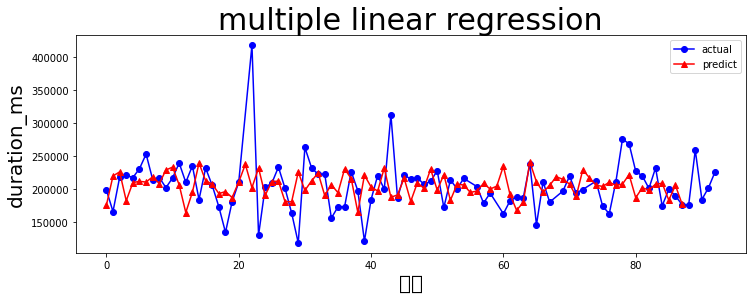

In [ ]:
# 3. ‘danceability’, ‘energy’, ‘loudness’, ‘speechiness’, ‘acousticness’,
# ‘instrumentalness’, ‘liveness’, ‘valence’, ‘tempo’ 의 9개 변수를 사용해
#‘duration_ms’를 예측하는 다중선형회귀 모델을 생성하시오. (학습 데이터는 100개의 데이터를 모두 사용할 것)
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model

X_data = basic[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo']]  #9개 변수
Y_data = basic[['duration_ms']]  # 예측할 변수

#다중선형회귀 모델 설계
linear_regression_model = linear_model.LinearRegression() 
linear_regression_model.fit(X = pd.DataFrame(X_data), y = Y_data)
linear_regression_model_prediction = linear_regression_model.predict(X = pd.DataFrame(X_data))

#다중회귀분석 실제값 / 예측값 도식화
fig = plt.figure( figsize = (12, 4))
graph = fig.add_subplot(1,1,1)
graph.plot(Y_data[:88], marker='o', color='blue', label='actual')
graph.plot(linear_regression_model_prediction[:88], marker='^', color='red', label='predict')
graph.set_title('multiple linear regression', size=30)
plt.xlabel('횟수', size=20)
plt.ylabel('duration_ms', size=20)
plt.legend(loc = 'best') 

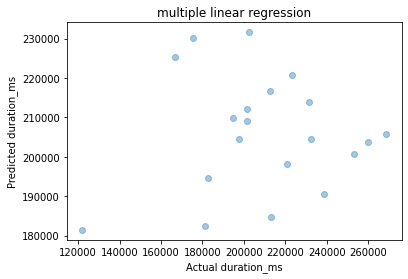

In [ ]:
# 예측-실제값 도식화
y_predict = mlr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual duration_ms")
plt.ylabel("Predicted duration_ms")
plt.title("multiple linear regression")
plt.show()

In [ ]:
# 4-1. 가수별로 ‘danceability’, ‘energy’, ‘loudness’, ‘acousticness’, ‘tempo’, ‘duration_ms’ 6개 변수의 평균값을 집계하시오

# 가수별 6개 변수의 평균값 집계
avg = basic.groupby('artists')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration_ms']].mean()
avg.head()

,danceability,energy,loudness,acousticness,tempo,duration_ms
artists,,,,,,
5 Seconds of Summer,0.5960,0.8540,-5.1140,0.01690,120.274,203418.0
6ix9ine,0.9310,0.3870,-9.1270,0.08800,125.978,179405.0
Anitta,0.7750,0.6790,-4.9850,0.18000,166.008,193456.0
Anne-Marie,0.6970,0.6830,-2.8810,0.03720,96.133,186987.0
Ariana Grande,0.6505,0.6855,-5.7205,0.03165,133.512,201733.5


    predict
0         3
1         3
2         0
3         4
4         3
..      ...
65        1
66        0
67        3
68        1
69        4

[70 rows x 1 columns]


<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


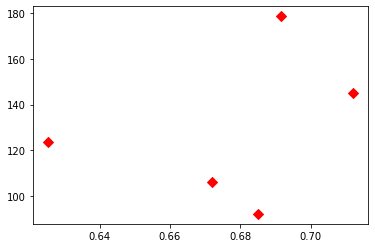

In [ ]:
# 4-2. 집계된 평균 데이터를 이용하여 K-means Clustering 기법으로 5개 군집으로 분류하시오. 
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

feature = avg[['energy','tempo']]
model = KMeans(n_clusters=5,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
print(predict)
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['energy'],r['tempo'],c=r['predict'],alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_,columns=['energy','tempo'])
center_x = centers['energy']
center_y = centers['tempo']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

[[ 6.92266667e-01  6.82666667e-01 -4.87620000e+00  1.47699333e-01
   1.22001133e+02  2.69459600e+05]
 [ 7.21153846e-01  6.65153846e-01 -5.59642308e+00  2.25783051e-01
   1.19389038e+02  1.94649199e+05]
 [ 7.34602564e-01  6.65076923e-01 -6.18732051e+00  1.42917949e-01
   1.14760692e+02  1.61182526e+05]
 [ 9.03000000e-01  6.75000000e-01 -3.44500000e+00  5.42000000e-01
   9.65070000e+01  4.17920000e+05]
 [ 6.92276667e-01  6.87373333e-01 -5.49514667e+00  1.33024533e-01
   1.22378060e+02  2.21232717e+05]]


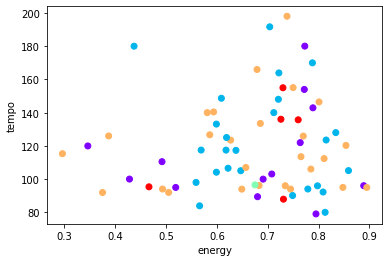

In [ ]:
##########################
x = avg.copy()
kmeans = KMeans(5)
kmeans.fit(x)
print(kmeans.cluster_centers_)
clusters = x.copy()
clusters['cluster_predict'] = kmeans.fit_predict(x)
plt.scatter(clusters['energy'], clusters['tempo'], c=clusters['cluster_predict'], cmap='rainbow')
plt.xlabel('energy')
plt.ylabel('tempo')
plt.show()

[[ 6.92276667e-01  6.87373333e-01 -5.49514667e+00  1.33024533e-01
   1.22378060e+02  2.21232717e+05]
 [ 7.34602564e-01  6.65076923e-01 -6.18732051e+00  1.42917949e-01
   1.14760692e+02  1.61182526e+05]
 [ 9.03000000e-01  6.75000000e-01 -3.44500000e+00  5.42000000e-01
   9.65070000e+01  4.17920000e+05]
 [ 6.92266667e-01  6.82666667e-01 -4.87620000e+00  1.47699333e-01
   1.22001133e+02  2.69459600e+05]
 [ 7.21153846e-01  6.65153846e-01 -5.59642308e+00  2.25783051e-01
   1.19389038e+02  1.94649199e+05]]


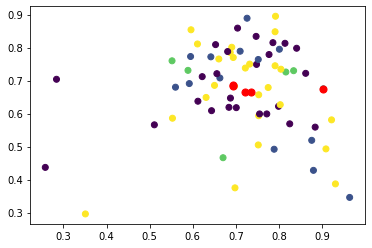

In [ ]:
##########################
# x = avg.copy()
x = avg.values
kmeans = KMeans(5)
kmeans.fit(x)
print(kmeans.cluster_centers_)
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, color="red");

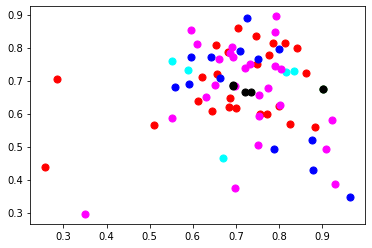

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
X = avg.values
# print(avg.values)
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans1.fit(X)

y_kmeans = kmeans1.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
# 4-3. 또한 군집 분석 결과 aritist명 ‘Sam Smith’와 같은 군집에 속한 가수들을 출력하고
avg['cluster'] = y_kmeans 
avg.head()
is_sam = avg.query('artists == "Sam Smith"')
# is_sam  #sam smith 는 군집 4에 속함을 알 수 있음
sam = avg.query('cluster == 4')
sam

,danceability,energy,loudness,acousticness,tempo,duration_ms,cluster
artists,,,,,,,
5 Seconds of Summer,0.5960,0.8540,-5.1140,0.016900,120.2740,203418.000000,4
6ix9ine,0.9310,0.3870,-9.1270,0.088000,125.9780,179405.000000,4
Anitta,0.7750,0.6790,-4.9850,0.180000,166.0080,193456.000000,4
Anne-Marie,0.6970,0.6830,-2.8810,0.037200,96.1330,186987.000000,4
Ariana Grande,0.6505,0.6855,-5.7205,0.031650,133.5120,201733.500000,4
Becky G,0.7910,0.7450,-3.6950,0.354000,94.0140,188560.000000,4
Billie Eilish,0.3510,0.2960,-10.1090,0.934000,115.2840,200186.000000,4
BlocBoy JB,0.9220,0.5810,-7.4950,0.001040,140.0220,181263.000000,4
Daddy Yankee,0.7910,0.8480,-3.4560,0.183000,95.0000,200480.000000,4


In [ ]:
# 4-4. 이 가수들의 Normalized된 평균 Danceability 값의 합을 출력하시오. (Normalization은 Min-Max Scaling이용)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sam[ : ] = scaler.fit_transform(sam[ : ])
sam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3051: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(key, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3036: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,danceability,energy,loudness,acousticness,tempo,duration_ms,cluster
artists,,,,,,,
5 Seconds of Summer,0.422414,0.931553,0.678024,0.017000,0.267100,0.953332,0.0
6ix9ine,1.000000,0.151920,0.133297,0.093209,0.320833,0.000000,0.0
Anitta,0.731034,0.639399,0.695534,0.191820,0.697923,0.557834,0.0
Anne-Marie,0.596552,0.646077,0.981132,0.038758,0.039687,0.301010,0.0
Ariana Grande,0.516379,0.650250,0.595697,0.032810,0.391804,0.886456,0.0
Becky G,0.758621,0.749583,0.870639,0.378323,0.019726,0.363460,0.0
Billie Eilish,0.000000,0.000000,0.000000,1.000000,0.220093,0.825019,0.0
BlocBoy JB,0.984483,0.475793,0.354826,0.000000,0.453130,0.073764,0.0
Daddy Yankee,0.758621,0.921536,0.903081,0.195035,0.029014,0.836691,0.0


In [ ]:
print("가수들의 Normalized된 평균 Danceability 값의 합 : ",sam['danceability'].sum())

가수들의 Normalized된 평균 Danceability 값의 합 :  16.593103448275865
